In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import re
from matplotlib import pyplot as plt

In [3]:
import shapely
#shapely.speedups.disable()

# MapPLUTO data

In [4]:
directory=r'.\NewYorkCity_complete/NewYorkCity'
variables=[]
out_dir=r"C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto"
out_dir2=r"C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto_nyc"

for filename in os.listdir(directory):
    mappluto=gpd.read_file(directory+'/'+filename+'/'+'Brooklyn/bkmappluto.shp')
    print('load',filename,mappluto.shape)
    if 'zipCode' in mappluto.columns:
        print('zipCode')
        mappluto['zipCode']=mappluto.zipCode.astype(str)
        mappluto=mappluto[(mappluto.zipCode=='11201') | (mappluto.zipCode=='11217')]
        print('filter')
        mappluto.to_file(out_dir+'\mappluto'+filename+".shp")
        print('export zipCode')
    elif 'ZIPCODE' in mappluto.columns:
        print('ZIPCODE')
        mappluto['ZIPCODE']=mappluto.ZIPCODE.astype(str)
        mappluto=mappluto[(mappluto.ZIPCODE=='11201') | (mappluto.ZIPCODE=='11217')]
        print('filter')
        mappluto.to_file(out_dir+'\mappluto'+filename+".shp")
        print('export ZIPCODE',mappluto.shape)
    if 'ZipCode' in mappluto.columns:
        print('ZipCode')
        mappluto['ZipCode']=mappluto.ZipCode.astype(str)
        mappluto=mappluto[(mappluto.ZipCode=='11201') | (mappluto.ZipCode=='11217')]
        print('filter')
        mappluto.to_file(out_dir+'\mappluto'+filename+".shp")
        print('export ZipCode',mappluto.shape)
    year='y_'+filename
    variables.append(mappluto.columns)

load 2002 (277406, 62)
zipCode
filter
export zipCode


KeyboardInterrupt: 

In [9]:
df=gpd.read_file(directory+'/'+'2012'+'/'+'Brooklyn/bkmappluto.shp')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 277865 entries, 0 to 277864
Data columns (total 84 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Borough     277865 non-null  object  
 1   Block       277865 non-null  int64   
 2   Lot         277865 non-null  int64   
 3   CD          277865 non-null  int64   
 4   CT2010      277154 non-null  object  
 5   CB2010      274804 non-null  object  
 6   SchoolDist  277354 non-null  object  
 7   Council     277865 non-null  int64   
 8   ZipCode     277865 non-null  int64   
 9   FireComp    277293 non-null  object  
 10  PolicePrct  277865 non-null  int64   
 11  Address     277471 non-null  object  
 12  ZoneDist1   277490 non-null  object  
 13  ZoneDist2   6780 non-null    object  
 14  ZoneDist3   65 non-null      object  
 15  ZoneDist4   4 non-null       object  
 16  Overlay1    36014 non-null   object  
 17  Overlay2    58 non-null      object  
 18  SPDist1     2705

In [4]:
# Creating a set with al the variables in lower case of each year
n_var=[]
for df in variables:
    df=list(df)
    for i,var in enumerate(df):
        df[i]=df[i].lower()
        print(i,var,df[i].lower())
    n_var.append(df)
    

0 borough borough
1 block block
2 lot lot
3 cd2 cd2
4 ct2000 ct2000
5 cb2000 cb2000
6 schoolDist schooldist
7 ccDist ccdist
8 zipCode zipcode
9 fireComp firecomp
10 healthArea healtharea
11 healthCtr healthctr
12 policePrct policeprct
13 address address
14 zoneDist1 zonedist1
15 zoneDist2 zonedist2
16 overlay1 overlay1
17 overlay2 overlay2
18 spDist1 spdist1
19 spDist2 spdist2
20 zoning1 zoning1
21 zoning2 zoning2
22 splitZone splitzone
23 bldgClass bldgclass
24 landUse2 landuse2
25 numEasmnt numeasmnt
26 ownerType ownertype
27 ownerName ownername
28 lotArea lotarea
29 floorArea floorarea
30 comArea comarea
31 resArea resarea
32 areaSource areasource
33 numBldgs numbldgs
34 numFloors numfloors
35 unitsRes unitsres
36 unitsTotal unitstotal
37 lotFront lotfront
38 lotDepth lotdepth
39 bldgFront bldgfront
40 bldgDepth bldgdepth
41 irrLotCode irrlotcode
42 cornerLot cornerlot
43 assessLand assessland
44 assessTotl assesstotl
45 exemptLand exemptland
46 exemptTotl exempttotl
47 yearBuilt ye

65 BoroCode borocode
66 BBL bbl
67 CondoNo condono
68 Tract2000 tract2000
69 XCoord xcoord
70 YCoord ycoord
71 ZoneMap zonemap
72 ZMCode zmcode
73 Sanborn sanborn
74 TaxMap taxmap
75 EDesigNum edesignum
76 APPBBL appbbl
77 APPDate appdate
78 PLUTOMapID plutomapid
79 Version version
80 MAPPLUTO_F mappluto_f
81 SHAPE_Leng shape_leng
82 SHAPE_Area shape_area
83 geometry geometry
0 Borough borough
1 Block block
2 Lot lot
3 CD cd
4 CT2000 ct2000
5 CB2000 cb2000
6 SchoolDist schooldist
7 Council council
8 ZipCode zipcode
9 FireComp firecomp
10 HealthArea healtharea
11 HealthCtr healthctr
12 PolicePrct policeprct
13 Address address
14 ZoneDist1 zonedist1
15 ZoneDist2 zonedist2
16 ZoneDist3 zonedist3
17 ZoneDist4 zonedist4
18 Overlay1 overlay1
19 Overlay2 overlay2
20 SPDist1 spdist1
21 SPDist2 spdist2
22 AllZoning1 allzoning1
23 AllZoning2 allzoning2
24 SplitZone splitzone
25 BldgClass bldgclass
26 LandUse landuse
27 Easements easements
28 OwnerType ownertype
29 OwnerName ownername
30 LotArea 

53 AssessLand assessland
54 AssessTot assesstot
55 ExemptLand exemptland
56 ExemptTot exempttot
57 YearBuilt yearbuilt
58 BuiltCode builtcode
59 YearAlter1 yearalter1
60 YearAlter2 yearalter2
61 HistDist histdist
62 Landmark landmark
63 BuiltFAR builtfar
64 ResidFAR residfar
65 CommFAR commfar
66 FacilFAR facilfar
67 BoroCode borocode
68 BBL bbl
69 CondoNo condono
70 Tract2010 tract2010
71 XCoord xcoord
72 YCoord ycoord
73 ZoneMap zonemap
74 ZMCode zmcode
75 Sanborn sanborn
76 TaxMap taxmap
77 EDesigNum edesignum
78 APPBBL appbbl
79 APPDate appdate
80 PLUTOMapID plutomapid
81 Version version
82 MAPPLUTO_F mappluto_f
83 SHAPE_Leng shape_leng
84 SHAPE_Area shape_area
85 geometry geometry
0 Borough borough
1 Block block
2 Lot lot
3 CD cd
4 CT2010 ct2010
5 CB2010 cb2010
6 SchoolDist schooldist
7 Council council
8 ZipCode zipcode
9 FireComp firecomp
10 PolicePrct policeprct
11 Address address
12 ZoneDist1 zonedist1
13 ZoneDist2 zonedist2
14 ZoneDist3 zonedist3
15 ZoneDist4 zonedist4
16 Over

In [5]:
#Creating a single string of all variables for each year
var_text=[]
for i in n_var:
    text=' '.join(i)
    var_text.append(text)

def ngrams_analyzer(string):
    string = re.sub(r'[,-./]', r'', string)
    ngrams = zip(*[string[i:] for i in range(3)])  # N-Gram length is 3
    return [''.join(ngram) for ngram in ngrams]
ngrams_analyzer('Hola como estas')
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(var_text)

In [6]:
#List of years
l=[]
for filename in os.listdir(directory):
    b='y_'+filename
    l.append(b)
l=l[:22]
l

['y_2002',
 'y_2003',
 'y_2004',
 'y_2005',
 'y_2006',
 'y_2007',
 'y_2009',
 'y_2009.2',
 'y_2010',
 'y_2010.2',
 'y_2011',
 'y_2011.2',
 'y_2012',
 'y_2012.2',
 'y_2013',
 'y_2013.2',
 'y_2014',
 'y_2014.2',
 'y_2015',
 'y_2016',
 'y_2016.2',
 'y_2017']

In [52]:
import scipy.sparse as sparse
variables_freq=pd.DataFrame.sparse.from_spmatrix(tfidf_matrix,columns=vectorizer.get_feature_names(),index=l).T



In [53]:
variables_freq

,y_2002,y_2003,y_2004,y_2005,y_2006,y_2007,y_2009,y_2009.2,y_2010,y_2010.2,...,y_2012,y_2012.2,y_2013,y_2013.2,y_2014,y_2014.2,y_2015,y_2016,y_2016.2,y_2017
address,0.068556,0.068118,0.103116,0.104293,0.094720,0.100196,0.099793,0.098882,0.098882,0.097817,...,0.098428,0.098428,0.094300,0.094300,0.094300,0.093657,0.093657,0.084224,0.083398,0.080160
allzoning1,0.000000,0.077638,0.117528,0.118870,0.107959,0.114200,0.113740,0.112702,0.112702,0.111488,...,0.112184,0.112184,0.107480,0.107480,0.107480,0.106747,0.106747,0.095996,0.000000,0.000000
allzoning2,0.000000,0.077638,0.117528,0.118870,0.107959,0.114200,0.113740,0.112702,0.112702,0.111488,...,0.112184,0.112184,0.107480,0.107480,0.107480,0.106747,0.106747,0.095996,0.000000,0.000000
appbbl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129958,0.128773,0.128773,0.127386,...,0.128181,0.128181,0.122806,0.122806,0.122806,0.121968,0.121968,0.109684,0.108608,0.104391
appdate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129958,0.128773,0.128773,0.127386,...,0.128181,0.128181,0.122806,0.122806,0.122806,0.121968,0.121968,0.109684,0.108608,0.104391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zonedist4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129958,0.128773,0.128773,0.127386,...,0.128181,0.128181,0.122806,0.122806,0.122806,0.121968,0.121968,0.109684,0.108608,0.104391
zonemap,0.000000,0.071146,0.107700,0.108929,0.098931,0.104650,0.104229,0.103278,0.103278,0.102165,...,0.102803,0.102803,0.098492,0.098492,0.098492,0.097820,0.097820,0.087968,0.087105,0.083723
zoning1,0.235994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zoning2,0.235994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
variables_freq.to_csv('./output/variables_freq.csv')

In [55]:
variables_freq=pd.read_csv('./output/variables_freq.csv')
variables_freq=variables_freq.rename(columns={'Unnamed: 0':'year'})
variables_freq.index=variables_freq['year']
variables_freq=variables_freq.drop(['year'], axis = 1)

In [56]:
variables_freq

,y_2002,y_2003,y_2004,y_2005,y_2006,y_2007,y_2009,y_2009.2,y_2010,y_2010.2,...,y_2012,y_2012.2,y_2013,y_2013.2,y_2014,y_2014.2,y_2015,y_2016,y_2016.2,y_2017
year,,,,,,,,,,,,,,,,,,,,,
address,0.068556,0.068118,0.103116,0.104293,0.094720,0.100196,0.099793,0.098882,0.098882,0.097817,...,0.098428,0.098428,0.094300,0.094300,0.094300,0.093657,0.093657,0.084224,0.083398,0.080160
allzoning1,0.000000,0.077638,0.117528,0.118870,0.107959,0.114200,0.113740,0.112702,0.112702,0.111488,...,0.112184,0.112184,0.107480,0.107480,0.107480,0.106747,0.106747,0.095996,0.000000,0.000000
allzoning2,0.000000,0.077638,0.117528,0.118870,0.107959,0.114200,0.113740,0.112702,0.112702,0.111488,...,0.112184,0.112184,0.107480,0.107480,0.107480,0.106747,0.106747,0.095996,0.000000,0.000000
appbbl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129958,0.128773,0.128773,0.127386,...,0.128181,0.128181,0.122806,0.122806,0.122806,0.121968,0.121968,0.109684,0.108608,0.104391
appdate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129958,0.128773,0.128773,0.127386,...,0.128181,0.128181,0.122806,0.122806,0.122806,0.121968,0.121968,0.109684,0.108608,0.104391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zonedist4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129958,0.128773,0.128773,0.127386,...,0.128181,0.128181,0.122806,0.122806,0.122806,0.121968,0.121968,0.109684,0.108608,0.104391
zonemap,0.000000,0.071146,0.107700,0.108929,0.098931,0.104650,0.104229,0.103278,0.103278,0.102165,...,0.102803,0.102803,0.098492,0.098492,0.098492,0.097820,0.097820,0.087968,0.087105,0.083723
zoning1,0.235994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
variables_freq

,y_2002,y_2003,y_2004,y_2005,y_2006,y_2007,y_2009,y_2009.2,y_2010,y_2010.2,...,y_2012,y_2012.2,y_2013,y_2013.2,y_2014,y_2014.2,y_2015,y_2016,y_2016.2,y_2017
year,,,,,,,,,,,,,,,,,,,,,
address,0.068556,0.068118,0.103116,0.104293,0.094720,0.100196,0.099793,0.098882,0.098882,0.097817,...,0.098428,0.098428,0.094300,0.094300,0.094300,0.093657,0.093657,0.084224,0.083398,0.080160
allzoning1,0.000000,0.077638,0.117528,0.118870,0.107959,0.114200,0.113740,0.112702,0.112702,0.111488,...,0.112184,0.112184,0.107480,0.107480,0.107480,0.106747,0.106747,0.095996,0.000000,0.000000
allzoning2,0.000000,0.077638,0.117528,0.118870,0.107959,0.114200,0.113740,0.112702,0.112702,0.111488,...,0.112184,0.112184,0.107480,0.107480,0.107480,0.106747,0.106747,0.095996,0.000000,0.000000
appbbl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129958,0.128773,0.128773,0.127386,...,0.128181,0.128181,0.122806,0.122806,0.122806,0.121968,0.121968,0.109684,0.108608,0.104391
appdate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129958,0.128773,0.128773,0.127386,...,0.128181,0.128181,0.122806,0.122806,0.122806,0.121968,0.121968,0.109684,0.108608,0.104391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zonedist4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129958,0.128773,0.128773,0.127386,...,0.128181,0.128181,0.122806,0.122806,0.122806,0.121968,0.121968,0.109684,0.108608,0.104391
zonemap,0.000000,0.071146,0.107700,0.108929,0.098931,0.104650,0.104229,0.103278,0.103278,0.102165,...,0.102803,0.102803,0.098492,0.098492,0.098492,0.097820,0.097820,0.087968,0.087105,0.083723
zoning1,0.235994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [58]:
def one(x):
    if x==0:
        return 0
    else :
        return 1

In [59]:
variables_freq=variables_freq.applymap(lambda x: one(x))

In [60]:
variables_freq

,y_2002,y_2003,y_2004,y_2005,y_2006,y_2007,y_2009,y_2009.2,y_2010,y_2010.2,...,y_2012,y_2012.2,y_2013,y_2013.2,y_2014,y_2014.2,y_2015,y_2016,y_2016.2,y_2017
year,,,,,,,,,,,,,,,,,,,,,
address,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
allzoning1,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
allzoning2,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
appbbl,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
appdate,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zonedist4,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
zonemap,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
zoning1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
variables_freq['sum']=variables_freq.apply(np.sum, axis = 1)
variables_freq=variables_freq.sort_values(by='sum',ascending=False)
variables_freq

,y_2002,y_2003,y_2004,y_2005,y_2006,y_2007,y_2009,y_2009.2,y_2010,y_2010.2,...,y_2012.2,y_2013,y_2013.2,y_2014,y_2014.2,y_2015,y_2016,y_2016.2,y_2017,sum
year,,,,,,,,,,,,,,,,,,,,,
address,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,22
policeprct,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,22
geometry,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,22
histdist,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,22
irrlotcode,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rpaddate,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
healthcent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
sanitdist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [62]:
variables_freq=variables_freq.drop(['sum'], axis = 1)

In [63]:
variables_freq.loc[['bbl','borough','block','lot','cd','cb2000','cb2010','ct2000','ct2010','zipcode','zonedist1','zonedist2',
                   'zonedist3','zonedist4','overlay1','overlay2','spdist1','spdist2','ltdheight','allzoning1','allzoning2',
                   'splitzone','bldgclass','landuse','easements','ownertype','lotarea','comarea','resarea','officearea',
                    'retailarea','garagearea','strgearea','factryarea','otherarea','numbldgs','numfloors','unitsres',
                    'lotfront','lotdepth','assessland','assesstot','yearbuilt','builtfar','residfar','commfar',
                   'xcoord','ycoord','shape_len','shape_area','geometry']]
#We have to unify cb 2000 and cb 2010, ct2000 and ct2010.
#Zonedist3 and zonedist4 
#Overlay 1- commercial zonning
#spdist2 Special purpuso district
#ltd height- limited height district- only after 2010
#replace shape leng for shape len

,y_2002,y_2003,y_2004,y_2005,y_2006,y_2007,y_2009,y_2009.2,y_2010,y_2010.2,...,y_2012,y_2012.2,y_2013,y_2013.2,y_2014,y_2014.2,y_2015,y_2016,y_2016.2,y_2017
year,,,,,,,,,,,,,,,,,,,,,
bbl,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
borough,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
block,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
lot,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
cd,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
cb2000,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
cb2010,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ct2000,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ct2010,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


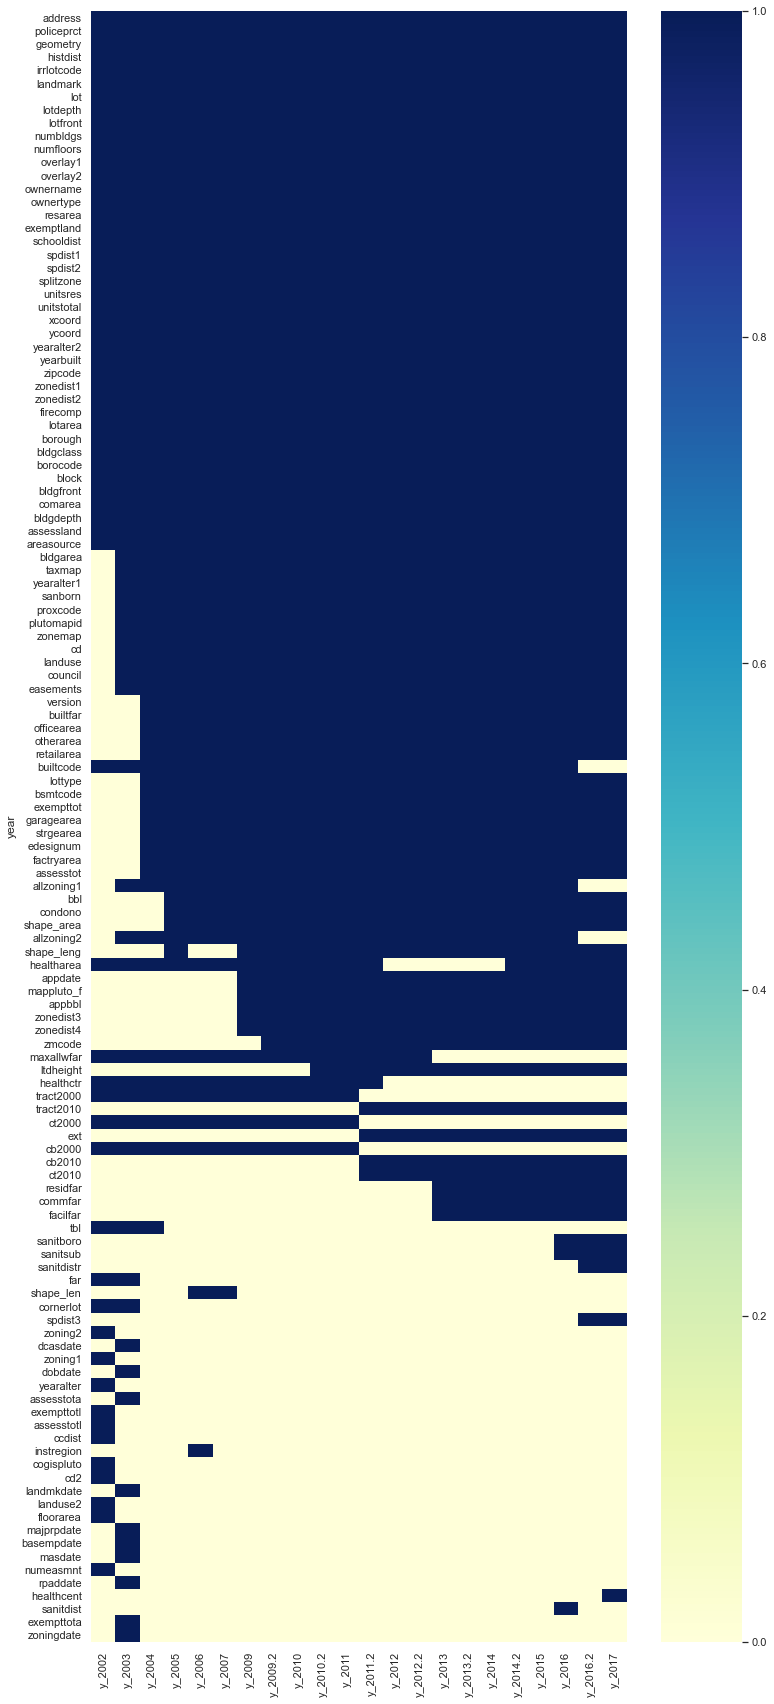

In [64]:
plt.figure(figsize=(12,30))
x = sns.heatmap(variables_freq, cmap="YlGnBu")

# Merging pluto datasets

In [65]:
l

['y_2002',
 'y_2003',
 'y_2004',
 'y_2005',
 'y_2006',
 'y_2007',
 'y_2009',
 'y_2009.2',
 'y_2010',
 'y_2010.2',
 'y_2011',
 'y_2011.2',
 'y_2012',
 'y_2012.2',
 'y_2013',
 'y_2013.2',
 'y_2014',
 'y_2014.2',
 'y_2015',
 'y_2016',
 'y_2016.2',
 'y_2017']

In [66]:
dir1=r"C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto"

In [67]:

var_list=['bbl','year','borough','block','lot','cd','census_block','census_track','zipcode','zonedist1','zonedist2',
                   'zonedist3','zonedist4','overlay1','overlay2','spdist1','spdist2','ltdheight','allzoning1','allzoning2',
                   'splitzone','bldgclass','landuse','easements','ownertype','lotarea','comarea','resarea','officearea',
                    'retailarea','garagearea','strgearea','factryarea','otherarea','numbldgs','numfloors','unitsres',
                    'lotfront','lotdepth','assessland','assesstot','yearbuilt','builtfar','residfar','commfar',
                   'xcoord','ycoord','shape_len','shape_area','geometry']
len(var_list)

50

In [115]:
import math
mappluto=pd.DataFrame(columns=var_list)
for filename in os.listdir(dir1):
    if filename.endswith(".shp"):
        #print(re.search('20[0-9][0-9].*[5.]',filename)[0][:-1])
        df=gpd.read_file(dir1+'/'+filename)
        df.columns=[x.lower() for x in df.columns]
        if ('cb2000' in df.columns) & ('ct2000' in df.columns):
            df=df.rename(columns={'cb2000':'census_block','ct2000':'census_track'})
        elif ('cb2010' in df.columns) & ('ct2010' in df.columns):
            df=df.rename(columns={'cb2010':'census_block','ct2010':'census_track'})
        if ('shape_leng' in df.columns) :
            df=df.rename(columns={'shape_leng':'shape_len'})
        df['year']=re.search('20[0-9][0-9].*[5.]',str(filename))[0][:-1]
        # change the name of cb and ct
        #change shape len and leng
        for var in var_list:
            if (var in df.columns):
                continue
            else :
                print('No value' ,var)
                df[var]=np.nan
        df=df[var_list]
        mappluto=pd.concat([mappluto,df])

No value bbl
No value cd
No value zonedist3
No value zonedist4
No value ltdheight
No value allzoning1
No value allzoning2
No value landuse
No value easements
No value officearea
No value retailarea
No value garagearea
No value strgearea
No value factryarea
No value otherarea
No value assesstot
No value builtfar
No value residfar
No value commfar
No value shape_len
No value shape_area
No value bbl
No value zonedist3
No value zonedist4
No value ltdheight
No value officearea
No value retailarea
No value garagearea
No value strgearea
No value factryarea
No value otherarea
No value assesstot
No value builtfar
No value residfar
No value commfar
No value shape_len
No value shape_area
No value bbl
No value zonedist3
No value zonedist4
No value ltdheight
No value residfar
No value commfar
No value shape_len
No value shape_area
No value zonedist3
No value zonedist4
No value ltdheight
No value residfar
No value commfar
No value zonedist3
No value zonedist4
No value ltdheight
No value residfar
No 

In [116]:
mappluto['bbl']=mappluto['bbl'].astype(str)
mappluto['block']=mappluto['block'].astype(str)
mappluto['lot']=mappluto['lot'].astype(str)
mappluto[['borough','block','census_block','lot','bbl']]


,borough,block,census_block,lot,bbl
0,BK,1.0,2002,1,nan
1,BK,1.0,2001,50,nan
2,BK,5.0,1001,1,nan
3,BK,6.0,1000,1,nan
4,BK,6.0,None,100,nan
...,...,...,...,...,...
7389,BK,198.0,3002,7501,3001987501.0
7390,BK,389.0,1000,7501,3003897501.0
7391,BK,193.0,4004,7501,3001937501.0
7392,BK,952.0,4001,7505,3009527505.0


In [117]:
mappluto['block']=[x[:-2] for x in mappluto.block]
mappluto['id']=['3'+'0'*(5-len(row['block']))+row['block']+'0'*(4-len(row['lot']))+row['lot'] for i,row in mappluto.iterrows()]
mappluto[['borough','block','census_block','lot','bbl','id']]

,borough,block,census_block,lot,bbl,id
0,BK,1,2002,1,nan,3000010001
1,BK,1,2001,50,nan,3000010050
2,BK,5,1001,1,nan,3000050001
3,BK,6,1000,1,nan,3000060001
4,BK,6,None,100,nan,3000060100
...,...,...,...,...,...,...
7389,BK,198,3002,7501,3001987501.0,3001987501
7390,BK,389,1000,7501,3003897501.0,3003897501
7391,BK,193,4004,7501,3001937501.0,3001937501
7392,BK,952,4001,7505,3009527505.0,3009527505


In [118]:
gdf = gpd.GeoDataFrame(
    mappluto, geometry=mappluto.geometry)

In [122]:
gdf

,bbl,year,borough,block,lot,cd,census_block,census_track,zipcode,zonedist1,...,yearbuilt,builtfar,residfar,commfar,xcoord,ycoord,shape_len,shape_area,geometry,id
0,nan,2002,BK,1,1,NaN,2002,21,11201,M3-1,...,1920,NaN,NaN,NaN,987496.0,195932.0,NaN,NaN,"POLYGON ((987974.166 196012.582, 987974.051 19...",3000010001
1,nan,2002,BK,1,50,NaN,2001,21,11201,M3-1,...,1920,NaN,NaN,NaN,987974.0,195981.0,NaN,NaN,"POLYGON ((987943.865 195994.180, 987943.244 19...",3000010050
2,nan,2002,BK,5,1,NaN,1001,21,11201,M3-1,...,0,NaN,NaN,NaN,989133.0,196088.0,NaN,NaN,"POLYGON ((989569.098 196447.264, 989568.606 19...",3000050001
3,nan,2002,BK,6,1,NaN,1000,21,11201,M3-1,...,0,NaN,NaN,NaN,989530.0,196085.0,NaN,NaN,"POLYGON ((990036.019 196477.775, 990024.193 19...",3000060001
4,nan,2002,BK,6,100,NaN,None,21,11201,M3-1,...,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"POLYGON ((989584.788 196432.340, 989585.722 19...",3000060100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,3001987501.0,2017,BK,198,7501,302.0,3002,39,11217,R7B,...,2005,6.95,3.00,0.0,989534.0,188320.0,384.116808,9200.183616,"POLYGON ((989618.486 188332.828, 989573.377 18...",3001987501
7390,3003897501.0,2017,BK,389,7501,302.0,1000,127,11217,R7B,...,2004,3.81,3.00,0.0,989464.0,188063.0,381.288120,9044.261755,"POLYGON ((989546.434 188078.966, 989500.425 18...",3003897501
7391,3001937501.0,2017,BK,193,7501,302.0,4004,43,11201,R6A,...,2002,3.36,3.00,0.0,986634.0,189847.0,412.507911,8445.969543,"POLYGON ((986675.204 189857.847, 986650.264 18...",3001937501
7392,3009527505.0,2017,BK,952,7505,306.0,4001,131,11217,R6B,...,2009,2.43,2.00,0.0,989474.0,186018.0,293.558663,4806.531834,"POLYGON ((989530.255 186044.812, 989485.518 18...",3009527505


In [119]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [123]:
gdf.to_file(r'C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto\all_years_tdbk\all_years_dtbk.shp')

In [4]:
df=gpd.read_file(r'C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto\all_years_tdbk\all_years_dtbk.shp')

In [6]:
df.year.unique()

array(['2002', '2003', '2004', '2005', '2006', '2007', '2009.2', '2009',
       '2010.2', '2010', '2011.2', '2011', '2012.2', '2012', '2013.2',
       '2013', '2014.2', '2014', '2015', '2016.2', '2016', '2017'],
      dtype=object)

In [7]:
y_filt=['2002', '2003', '2004', '2005', '2006', '2007', '2009.2',
       '2010.2', '2011.2', '2012.2',  '2013.2',
        '2014.2',  '2015', '2016.2', '2017']

In [21]:
df=df[df.year.isin(y_filt)]

In [1]:
df['year']=[sub.replace('.2', '') for sub in df.year]

NameError: name 'df' is not defined

In [29]:
df.to_file(r'C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto\all_years_tdbk\all_years_dtbk.shp')

In [30]:
df.to_csv(r'C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto\all_years_tdbk\all_years_dtbk.csv')

In [32]:
pd.read_csv(r'C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto\all_years_tdbk\all_years_dtbk.csv')

C:\Users\Jose Ramon Romero P\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,12,13,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,bbl,year,borough,block,lot,cd,census_blo,census_tra,zipcode,...,yearbuilt,builtfar,residfar,commfar,xcoord,ycoord,shape_len,shape_area,id,geometry
0,0,NaN,2002,BK,1,1,NaN,2002.0,21.0,11201,...,1920,NaN,NaN,NaN,987496.0,195932.0,NaN,NaN,3000010001,"POLYGON ((987974.1663040253 196012.5821881599,..."
1,1,NaN,2002,BK,1,50,NaN,2001.0,21.0,11201,...,1920,NaN,NaN,NaN,987974.0,195981.0,NaN,NaN,3000010050,"POLYGON ((987943.8651199971 195994.1798841427,..."
2,2,NaN,2002,BK,5,1,NaN,1001.0,21.0,11201,...,0,NaN,NaN,NaN,989133.0,196088.0,NaN,NaN,3000050001,"POLYGON ((989569.0975055107 196447.2640445647,..."
3,3,NaN,2002,BK,6,1,NaN,1000.0,21.0,11201,...,0,NaN,NaN,NaN,989530.0,196085.0,NaN,NaN,3000060001,"POLYGON ((990036.0194899455 196477.7751485931,..."
4,4,NaN,2002,BK,6,100,NaN,NaN,21.0,11201,...,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,3000060100,"POLYGON ((989584.7882575253 196432.3397565508,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111999,164159,3.001988e+09,2017,BK,198,7501,302.0,3002.0,39.0,11217,...,2005,6.95,3.00,0.0,989534.0,188320.0,384.116808,9200.183616,3001987501,"POLYGON ((989618.4855999947 188332.8284000009,..."
112000,164160,3.003898e+09,2017,BK,389,7501,302.0,1000.0,127.0,11217,...,2004,3.81,3.00,0.0,989464.0,188063.0,381.288120,9044.261755,3003897501,"POLYGON ((989546.4344000071 188078.9658000022,..."
112001,164161,3.001938e+09,2017,BK,193,7501,302.0,4004.0,43.0,11201,...,2002,3.36,3.00,0.0,986634.0,189847.0,412.507911,8445.969543,3001937501,"POLYGON ((986675.2041999996 189857.8467999995,..."
112002,164162,3.009528e+09,2017,BK,952,7505,306.0,4001.0,131.0,11217,...,2009,2.43,2.00,0.0,989474.0,186018.0,293.558663,4806.531834,3009527505,"POLYGON ((989530.2546000034 186044.8120000064,..."


In [10]:
pd.read_csv(r'C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto\all_years_tdbk\all_years_dtbk.csv')

C:\Users\Jose Ramon Romero P\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7,12,13,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,bbl,year,borough,block,lot,cd,census_blo,census_tra,zipcode,...,yearbuilt,builtfar,residfar,commfar,xcoord,ycoord,shape_len,shape_area,id,geometry
0,0,NaN,2002,BK,1,1,NaN,2002.0,21.0,11201,...,1920,NaN,NaN,NaN,987496.0,195932.0,NaN,NaN,3000010001,"POLYGON ((987974.1663040253 196012.5821881599,..."
1,1,NaN,2002,BK,1,50,NaN,2001.0,21.0,11201,...,1920,NaN,NaN,NaN,987974.0,195981.0,NaN,NaN,3000010050,"POLYGON ((987943.8651199971 195994.1798841427,..."
2,2,NaN,2002,BK,5,1,NaN,1001.0,21.0,11201,...,0,NaN,NaN,NaN,989133.0,196088.0,NaN,NaN,3000050001,"POLYGON ((989569.0975055107 196447.2640445647,..."
3,3,NaN,2002,BK,6,1,NaN,1000.0,21.0,11201,...,0,NaN,NaN,NaN,989530.0,196085.0,NaN,NaN,3000060001,"POLYGON ((990036.0194899455 196477.7751485931,..."
4,4,NaN,2002,BK,6,100,NaN,NaN,21.0,11201,...,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,3000060100,"POLYGON ((989584.7882575253 196432.3397565508,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111999,164159,3.001988e+09,2017,BK,198,7501,302.0,3002.0,39.0,11217,...,2005,6.95,3.00,0.0,989534.0,188320.0,384.116808,9200.183616,3001987501,"POLYGON ((989618.4855999947 188332.8284000009,..."
112000,164160,3.003898e+09,2017,BK,389,7501,302.0,1000.0,127.0,11217,...,2004,3.81,3.00,0.0,989464.0,188063.0,381.288120,9044.261755,3003897501,"POLYGON ((989546.4344000071 188078.9658000022,..."
112001,164161,3.001938e+09,2017,BK,193,7501,302.0,4004.0,43.0,11201,...,2002,3.36,3.00,0.0,986634.0,189847.0,412.507911,8445.969543,3001937501,"POLYGON ((986675.2041999996 189857.8467999995,..."
112002,164162,3.009528e+09,2017,BK,952,7505,306.0,4001.0,131.0,11217,...,2009,2.43,2.00,0.0,989474.0,186018.0,293.558663,4806.531834,3009527505,"POLYGON ((989530.2546000034 186044.8120000064,..."
